In [ ]:
# Problem from https://open.kattis.com/problems/bumped

from heapq import heappush, heappop
from collections import defaultdict

# ETL

inp_lines = """8 11 1 0 5
0 1 10
0 2 10
1 2 10
2 6 40
6 7 10
5 6 10
3 5 15
3 6 40
3 4 20
1 4 20
1 3 30
4 7""".splitlines()

n, m, f, s, t = map(int, inp_lines[0].split()) # as number

# input m lines of u, v, w
graph = defaultdict(list)
for i in range(m):
    u, v, w = map(int, inp_lines[1+i].split())
    graph[u].append((v, w))
    graph[v].append((u, w))

# input f lines
flights = []
for i in range(f):
    u, v = map(int, inp_lines[1+m+i].split())
    flights.append((u, v))
    # there exists flight from u to v


In [31]:
# Construct state space graph where node is (u, used_flight)
# used_flight is integer variable which is 0 or 1
# if used_flight is True, it means that the flight is used

# construct state space graph
# key: (u, used_flight), value: adjacency list from u
ssg = defaultdict(list)

# add an edge to ssg
for u in range(n):
    for v, w in graph[u]:
        ssg[(u, 0)].append(((v, 0), w))
        ssg[(u, 1)].append(((v, 1), w))

# if there exists a flight from u to v
for (u, v) in flights:
    ssg[(u, 0)].append(((v, 1), 0))

In [32]:
# Apply dijkstra to ssg
dist = defaultdict(lambda: float('inf'))
dist[(s, 0)] = 0
P = defaultdict(lambda: int('inf'))
P[(s,0)] = P[(s,1)] = 0

pq = [(0, (s, 0))]
S = []
while pq:
    d, (u, used_flight) = heappop(pq)
    S.append((u, used_flight))

    for (v, next_used_flight), w in ssg[(u, used_flight)]: # if there exists an edge from u to v
        if (v, next_used_flight) in S:
            continue

        if dist[(v, next_used_flight)] > dist[(u, used_flight)] + w:
            dist[(v, next_used_flight)] = dist[(u, used_flight)] + w
            heappush(pq, (dist[(v, next_used_flight)], (v, next_used_flight)))
            P[(v, next_used_flight)] = (u, used_flight)

print(min(dist[(t, 0)], dist[(t, 1)]))

# draw shortest path using P
path = []
u = t
used_flight = 0 if dist[(t, 0)] < dist[(t, 1)] else 1
while u != s:
    path.append((u, used_flight))
    u, used_flight = P[(u, used_flight)]
    
path.append((s, 0))
path = path[::-1]
print(path)

50
[(0, 0), (1, 0), (4, 0), (7, 1), (6, 1), (5, 1)]


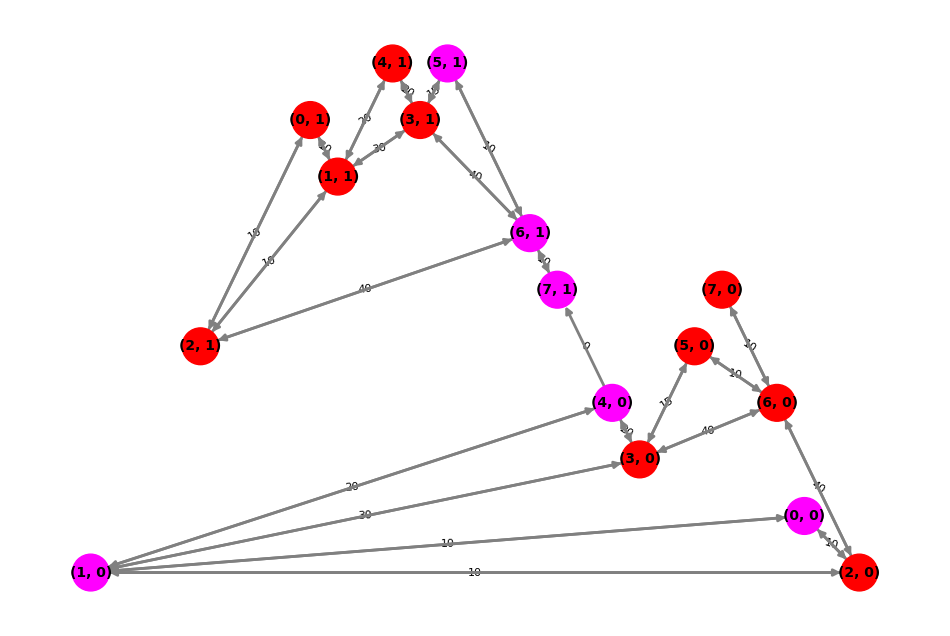

In [ ]:
# draw state space graph

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for u, adj in ssg.items():
    for v, w in adj:
        G.add_edge(u, v, weight=w)

# pos = nx.spring_layout(G)
pos = nx.planar_layout(G)
plt.figure(figsize=(12, 8))
# nx.draw(G, pos, with_labels=True, node_size=700, font_size=10, font_weight='bold', edge_color='gray', width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

# color nodes from the shortest path
color_map = ['magenta' if node in path else 'red' for node in G.nodes()]
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=700, font_size=10, font_weight='bold', edge_color='gray', width=2)


plt.show()  